# **Anthony Amgad Deep Learning (CSE485) Project - 19P9880**
>## *Fruit Recognition*

---



Python Imports

In [17]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
from IPython.display import display, Markdown, Latex
from sklearn.metrics import classification_report, confusion_matrix

Getting image paths

In [3]:
paths=[]
for name in glob('/content/FruitRecognition/*', recursive=True):
  if not name.endswith('.zip'):
    paths.append(name)
paths

['/content/FruitRecognition/Tomatoes',
 '/content/FruitRecognition/Pitaya',
 '/content/FruitRecognition/Plum',
 '/content/FruitRecognition/Carambola',
 '/content/FruitRecognition/Pear',
 '/content/FruitRecognition/Orange',
 '/content/FruitRecognition/Mango',
 '/content/FruitRecognition/muskmelon',
 '/content/FruitRecognition/Kiwi',
 '/content/FruitRecognition/Apple',
 '/content/FruitRecognition/Banana',
 '/content/FruitRecognition/Peach',
 '/content/FruitRecognition/Guava',
 '/content/FruitRecognition/Pomegranate',
 '/content/FruitRecognition/Persimmon']

In [4]:
img_paths=[]
extra_paths=[]
for i in paths:
  for name in glob(i+'/*'):
    if name.endswith('.png'):
      a=name.split('/')
      img_paths.append([name,a[-2]])
    else:
      extra_paths.append(name)
extra_paths

['/content/FruitRecognition/Kiwi/Kiwi B',
 '/content/FruitRecognition/Kiwi/Kiwi C',
 '/content/FruitRecognition/Kiwi/kiwi A',
 '/content/FruitRecognition/Kiwi/Total Number of Kiwi fruit',
 '/content/FruitRecognition/Apple/Apple B',
 '/content/FruitRecognition/Apple/Apple A',
 '/content/FruitRecognition/Apple/Apple D',
 '/content/FruitRecognition/Apple/Total Number of Apples',
 '/content/FruitRecognition/Apple/Apple C',
 '/content/FruitRecognition/Apple/Apple E',
 '/content/FruitRecognition/Apple/Apple F',
 '/content/FruitRecognition/Guava/guava total final',
 '/content/FruitRecognition/Guava/guava A',
 '/content/FruitRecognition/Guava/Guava total',
 '/content/FruitRecognition/Guava/guava B']

In [5]:
extra_imgs=[]
for i in extra_paths:
  if i=='/content/FruitRecognition/Apple/Total Number of Apples':
    for name in glob(i+'/*'):
      if name.endswith('.png'):
        extra_imgs.append([name,'Apple'])
  elif i=='/content/FruitRecognition/Guava/guava total final':
    for name in glob(i+'/*'):
      if name.endswith('.png'):
        extra_imgs.append([name,'Guava'])
  elif i=='/content/FruitRecognition/Kiwi/Total Number of Kiwi fruit':
    for name in glob(i+'/*'):
      if name.endswith('.png'):
        extra_imgs.append([name,'Kiwi'])
imgFinal=img_paths+extra_imgs
len(imgFinal)

43848

Making a labels list

In [6]:
labels=[]
for i in range(len(imgFinal)):
  labels.append(imgFinal[i][1])
  imgFinal[i]=imgFinal[i][0]
set(labels)

{'Apple',
 'Banana',
 'Carambola',
 'Guava',
 'Kiwi',
 'Mango',
 'Orange',
 'Peach',
 'Pear',
 'Persimmon',
 'Pitaya',
 'Plum',
 'Pomegranate',
 'Tomatoes',
 'muskmelon'}

#*Count Plot of data in data set:*

<Axes: xlabel='1', ylabel='count'>

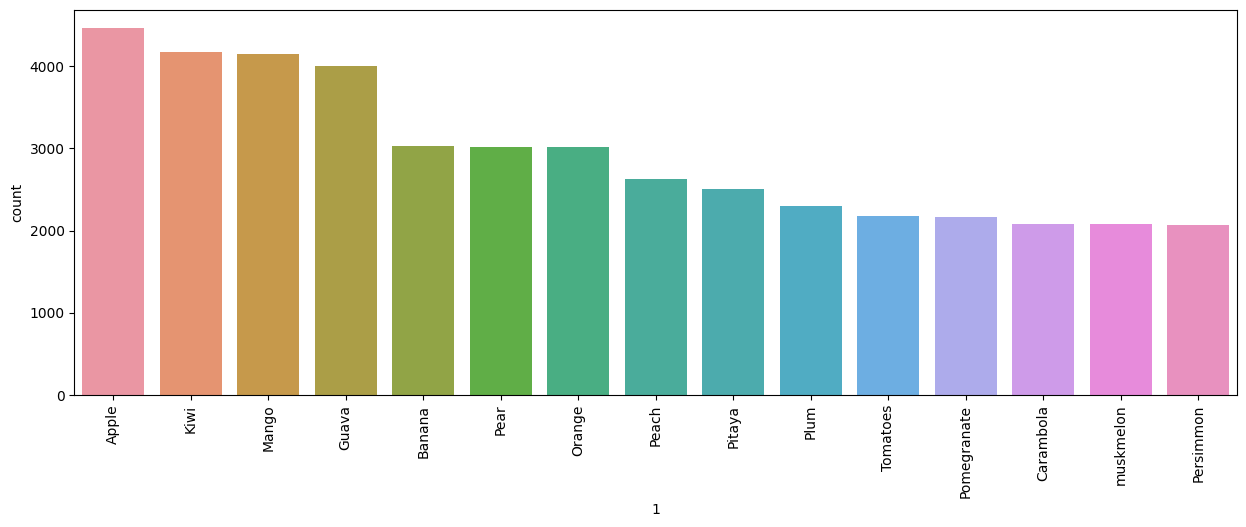

In [7]:
img_path = pd.Series(imgFinal).astype(str)
labels=pd.Series(labels)
data = pd.concat([img_path,labels],axis=1)
display(Markdown("#*Count Plot of data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=data[1], order=data[1].value_counts().index)

Dividing the dataset into training and testing

In [8]:
train_set , test_set = train_test_split(data,test_size=0.2, shuffle=True)

#*Count Plot of Training data in data set:*

<Axes: xlabel='1', ylabel='count'>

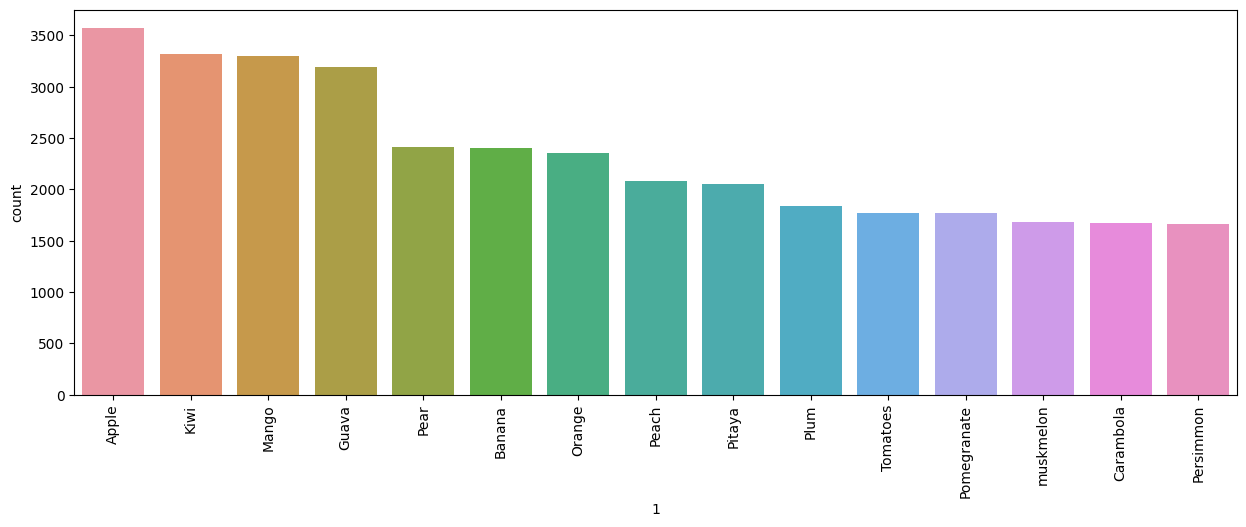

In [9]:
display(Markdown("#*Count Plot of Training data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=train_set[1], order=train_set[1].value_counts().index)

#*Count Plot of Testing data in data set:*

<Axes: xlabel='1', ylabel='count'>

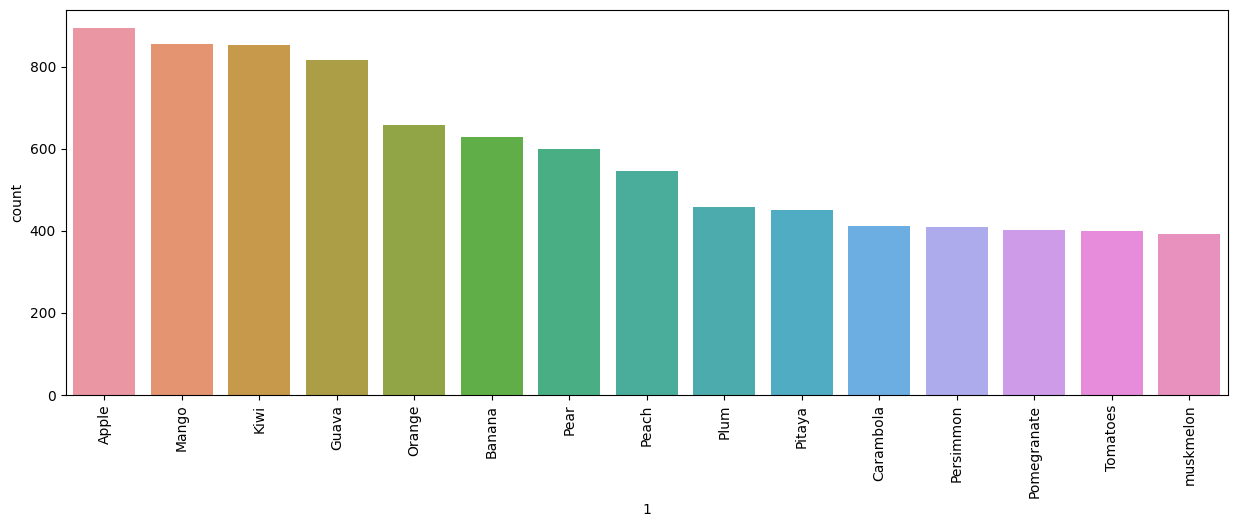

In [10]:
display(Markdown("#*Count Plot of Testing data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=test_set[1], order=test_set[1].value_counts().index)

##Creating the Keras Model

###Creating the VGG-16 model but with 15 outputs to colerate to the labels

In [11]:
train_gen = ImageDataGenerator(validation_split=0.1)
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_dataframe(
    dataframe = train_set,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    subset = 'training'
)

val_data = train_gen.flow_from_dataframe(
    dataframe = train_set,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True,
    subset = 'validation'
)

test_data = test_gen.flow_from_dataframe(
    dataframe = test_set,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = False
)

Found 31571 validated image filenames belonging to 15 classes.
Found 3507 validated image filenames belonging to 15 classes.
Found 8770 validated image filenames belonging to 15 classes.


In [12]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=15, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [13]:
model.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
history = model.fit(train_data,epochs=15,validation_data=val_data)

Epoch 1/15
987/987 [==============================] - 505s 487ms/step - loss: 1.4722 - accuracy: 0.5255 - val_loss: 0.6816 - val_accuracy: 0.7636
Epoch 2/15
987/987 [==============================] - 493s 499ms/step - loss: 0.5632 - accuracy: 0.8142 - val_loss: 0.4719 - val_accuracy: 0.8329
Epoch 3/15
987/987 [==============================] - 493s 499ms/step - loss: 0.3257 - accuracy: 0.8889 - val_loss: 0.2982 - val_accuracy: 0.8973
Epoch 4/15
987/987 [==============================] - 474s 480ms/step - loss: 0.1940 - accuracy: 0.9349 - val_loss: 0.3352 - val_accuracy: 0.8919
Epoch 5/15
987/987 [==============================] - 471s 477ms/step - loss: 0.4661 - accuracy: 0.8533 - val_loss: 0.4412 - val_accuracy: 0.8691
Epoch 6/15
987/987 [==============================] - 491s 497ms/step - loss: 0.1084 - accuracy: 0.9675 - val_loss: 0.4071 - val_accuracy: 0.8837
Epoch 7/15
987/987 [==============================] - 470s 476ms/step - loss: 0.0747 - accuracy: 0.9784 - val_loss: 0.4289 -

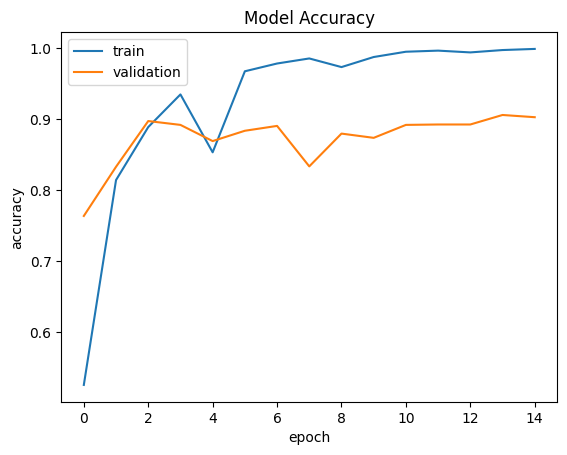

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

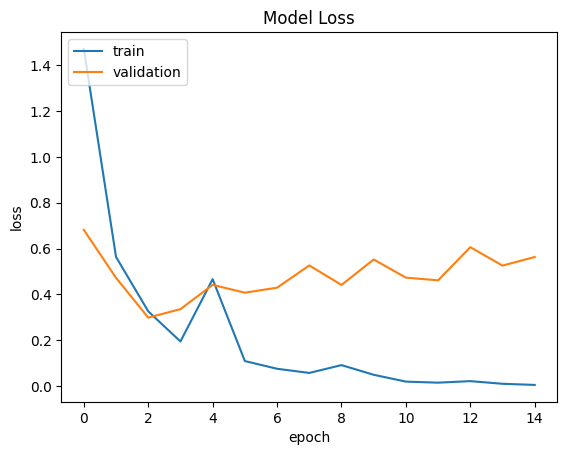

In [16]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [19]:
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)
print(classification_report(test_data.labels,pred))

275/275 [==============================] - 78s 284ms/step
              precision    recall  f1-score   support

           0       0.81      0.87      0.84       894
           1       0.86      0.83      0.85       628
           2       0.90      0.88      0.89       411
           3       0.87      0.90      0.89       815
           4       0.94      0.91      0.93       852
           5       0.89      0.89      0.89       856
           6       0.95      0.98      0.97       658
           7       0.88      0.92      0.90       545
           8       0.85      0.81      0.83       598
           9       0.96      0.95      0.96       410
          10       0.96      0.91      0.94       451
          11       0.98      0.98      0.98       458
          12       0.88      0.92      0.90       401
          13       0.95      0.92      0.94       400
          14       0.89      0.87      0.88       393

    accuracy                           0.90      8770
   macro avg       0.9

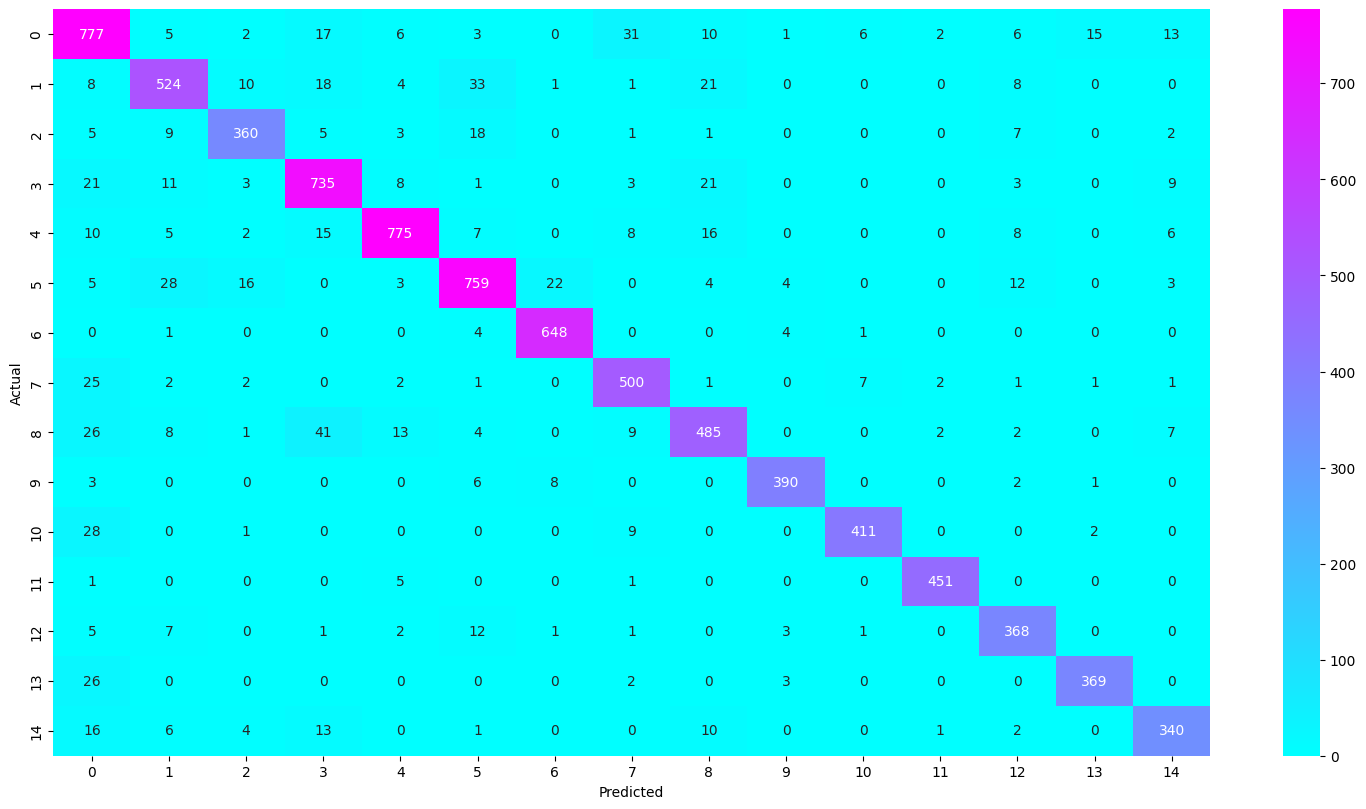

In [20]:
classes=[i for i in range(15)]
con_mat_df = pd.DataFrame(confusion_matrix(test_data.labels,pred),
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(15, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
model_json = model.to_json()
with open("/content/model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/model.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
train_data.class_indices

{'Apple': 0,
 'Banana': 1,
 'Carambola': 2,
 'Guava': 3,
 'Kiwi': 4,
 'Mango': 5,
 'Orange': 6,
 'Peach': 7,
 'Pear': 8,
 'Persimmon': 9,
 'Pitaya': 10,
 'Plum': 11,
 'Pomegranate': 12,
 'Tomatoes': 13,
 'muskmelon': 14}